In [1]:
import numpy as np
import pandas as pd

import os
import json
from pathlib import Path

import matplotlib.pyplot as plt
from matplotlib import colors
import numpy as np

%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.dates as mdates

In [2]:
def set_pandas_display_options() -> None:
    display = pd.options.display
    display.max_columns = 1000
    display.max_rows = 1000
    display.max_colwidth = 199
    display.width = None

set_pandas_display_options()

### Weather

In [3]:
filename = './weather_goverment_data/training_data_with_weather_info_week_3.csv'
weather_df = pd.read_csv(filename)
weather_df.head()

,Id,Province_State,Country_Region,Date,ConfirmedCases,Fatalities,country+province,Lat,Long,day_from_jan_first,temp,min,max,stp,slp,dewp,rh,ah,wdsp,prcp,fog
0,1,NaN,Afghanistan,2020-01-22,0.0,0.0,Afghanistan-,33.0,65.0,22,42.6,33.6,54.9,999.9,1024.3,27.4,0.545709,0.186448,9.4,0.00,0
1,2,NaN,Afghanistan,2020-01-23,0.0,0.0,Afghanistan-,33.0,65.0,23,42.0,32.7,55.9,999.9,1020.8,22.8,0.461259,0.163225,14.9,99.99,1
2,3,NaN,Afghanistan,2020-01-24,0.0,0.0,Afghanistan-,33.0,65.0,24,40.1,36.9,43.2,999.9,1018.6,34.5,0.801794,0.325375,10.4,0.17,1
3,4,NaN,Afghanistan,2020-01-25,0.0,0.0,Afghanistan-,33.0,65.0,25,46.0,37.9,56.3,999.9,1018.0,37.8,0.728175,0.214562,6.1,0.57,1
4,5,NaN,Afghanistan,2020-01-26,0.0,0.0,Afghanistan-,33.0,65.0,26,42.8,36.1,53.1,999.9,1014.8,33.2,0.685513,0.231656,10.8,0.00,1


In [4]:
def plot_confirmed_by_day(country):
    plt.figure(figsize=(20, 10))
    df = weather_df[weather_df['Country_Region']==country]
    df = df.groupby(['Date']).agg({'ConfirmedCases':'sum','temp':'mean'}).reset_index()
    df['increase'] = df['ConfirmedCases'] - df['ConfirmedCases'].shift(1)
    sns.lineplot(data=df.set_index('Date')[['ConfirmedCases', 'increase']]).set_title('Time Series of COVID-19 cases in {}'.format(country),fontsize=20)
    plt.xticks(rotation=45)

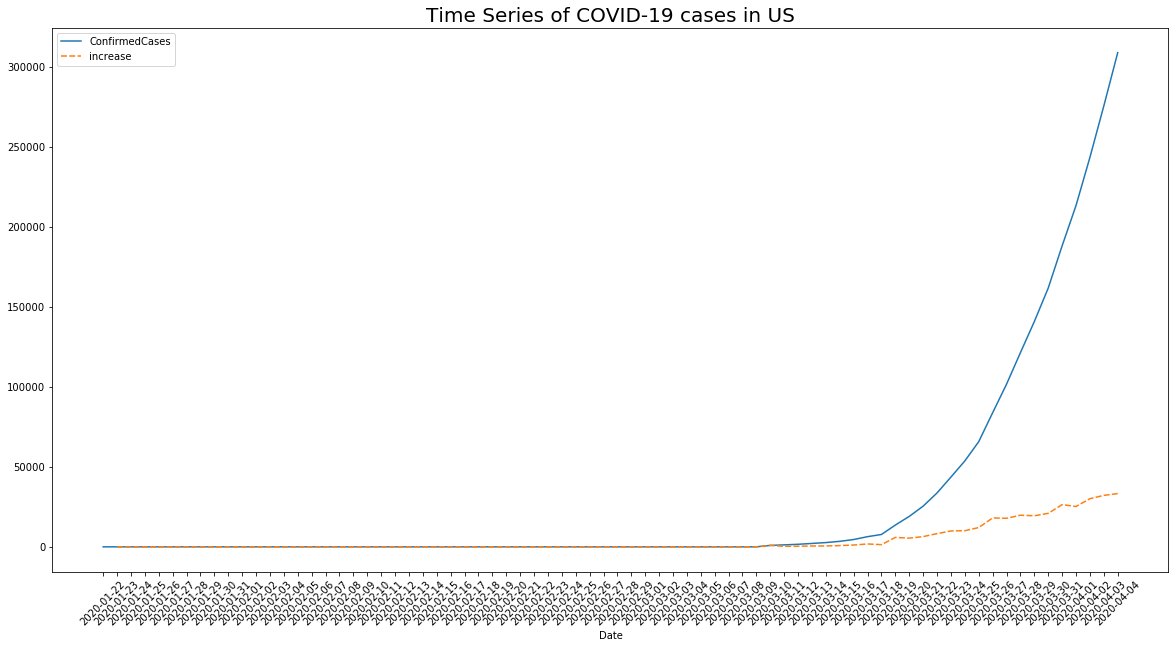

In [5]:
plot_confirmed_by_day('US')

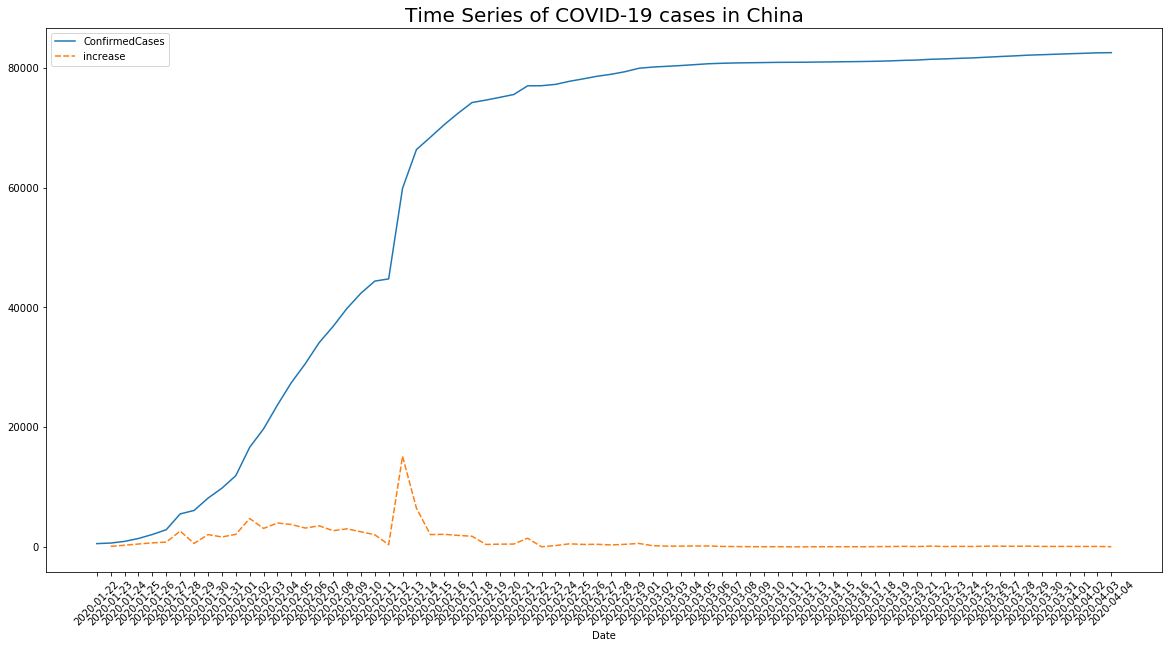

In [6]:
plot_confirmed_by_day('China')

In [7]:
def plot_temp_by_day(country):
    plt.figure(figsize=(20, 10))
    df = weather_df[weather_df['Country_Region']==country]
    df = df.groupby(['Date']).agg({'temp':'mean', 'min': 'min', 'max':'max'}).reset_index()
    ax = sns.lineplot(data=df.set_index('Date')[['temp', 'min', 'max']])
    ax.set_title('Time Series of temperature in {}'.format(country),fontsize=20)
    plt.xticks(rotation=45)
#     locator = mdates.AutoDateLocator()
#     locator.intervald[DAILY] = [5]
#     ax.xaxis.set_major_locator(locator())
#     ax.xaxis.set_major_formatter(ticker.ScalarFormatter())

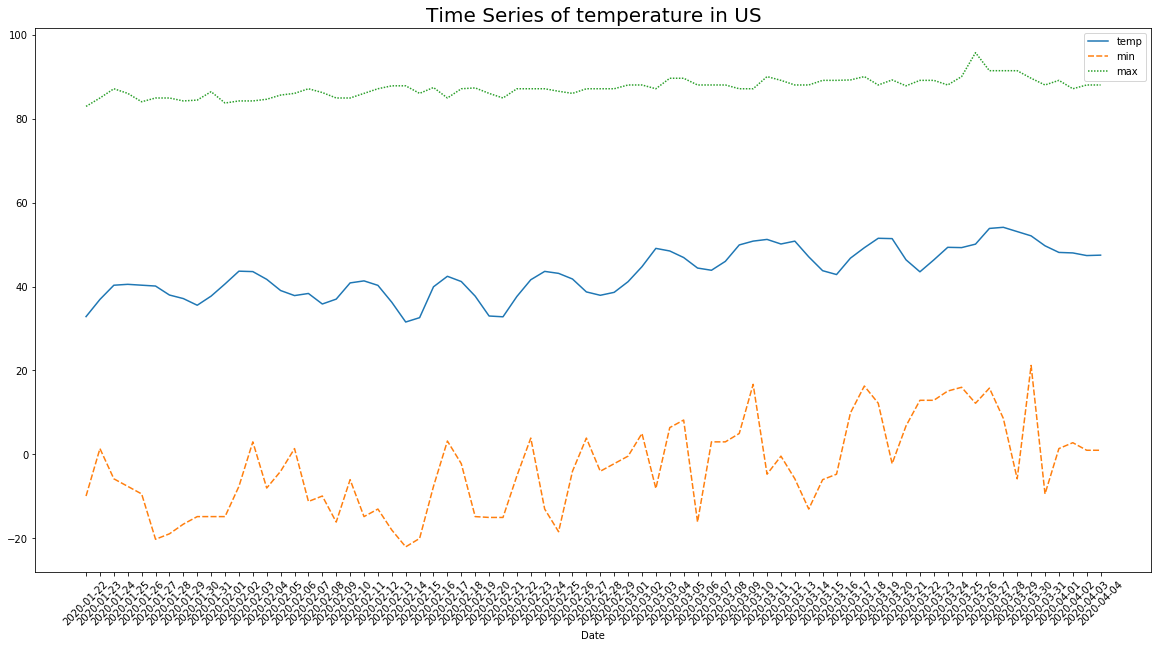

In [8]:
plot_temp_by_day('US')

In [9]:
def plot_wind_by_day(country):
    plt.figure(figsize=(20, 10))
    df = weather_df[weather_df['Country_Region']==country]
    df = df.groupby(['Date']).agg({'wdsp':'mean'}).reset_index()
    df.rename(columns={'wdsp':'wind speed'}, inplace=True)
    ax = sns.lineplot(data=df.set_index('Date')['wind speed'])
    ax.set_title('Time Series of wind speed in {}'.format(country),fontsize=20)
    plt.xticks(rotation=45)

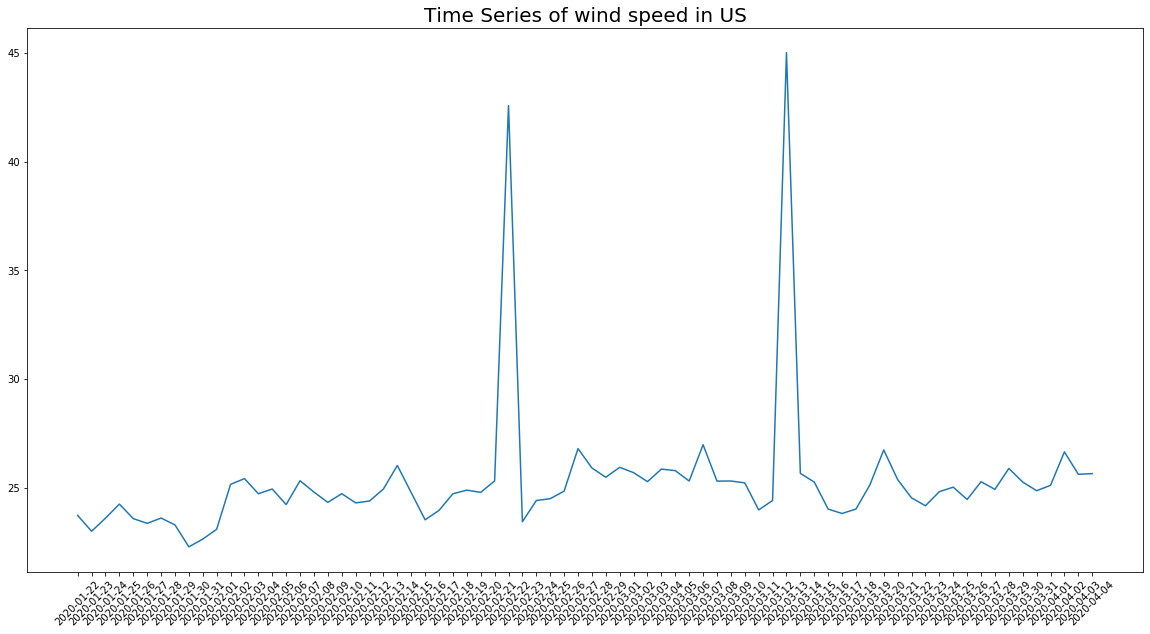

In [10]:
plot_wind_by_day('US')

In [11]:
def plot_precipitation_by_day(country):
    plt.figure(figsize=(20, 10))
    df = weather_df[weather_df['Country_Region']==country]
    df = df.groupby(['Date']).agg({'prcp':'mean'}).reset_index()
    df.rename(columns={'prcp':'precipitation'}, inplace=True)
    ax = sns.lineplot(data=df.set_index('Date')['precipitation'])
    ax.set_title('Time Series of precipitation in {}'.format(country),fontsize=20)
    plt.xticks(rotation=45)

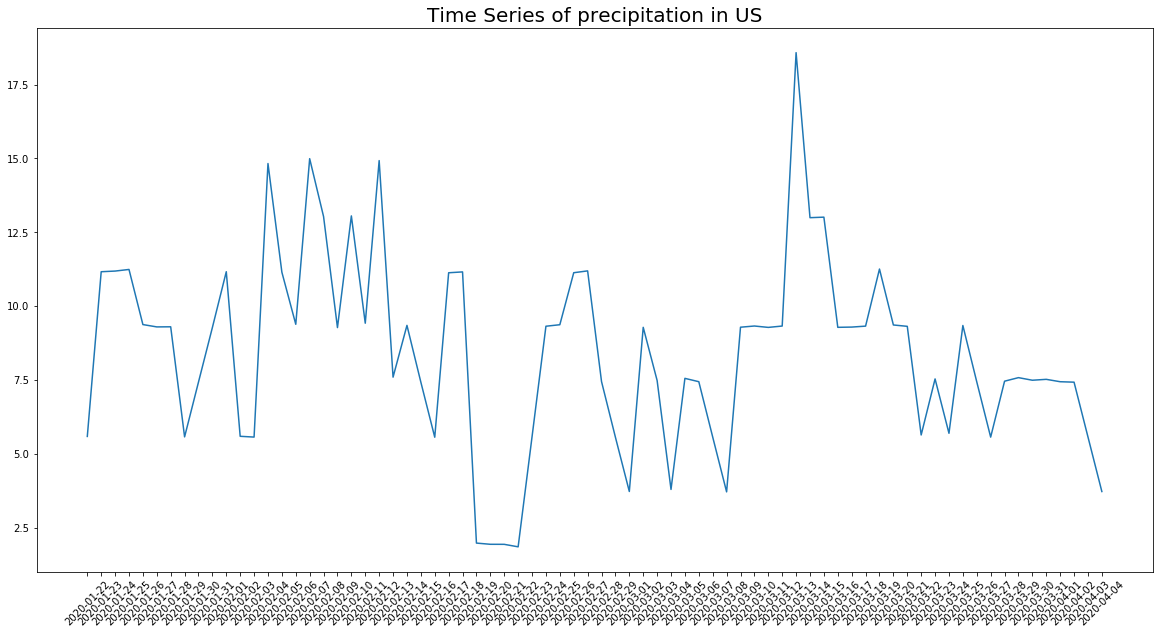

In [12]:
plot_precipitation_by_day('US')

In [13]:
def plot_pressure_by_day(country):
    plt.figure(figsize=(20, 10))
    df = weather_df[weather_df['Country_Region']==country]
    df = df.groupby(['Date']).agg({'slp':'mean'}).reset_index()
    df.rename(columns={'slp':'station pressure'}, inplace=True)
    ax = sns.lineplot(data=df.set_index('Date')['station pressure'])
    ax.set_title('Time Series of station pressure in {}'.format(country),fontsize=20)
    plt.xticks(rotation=45)

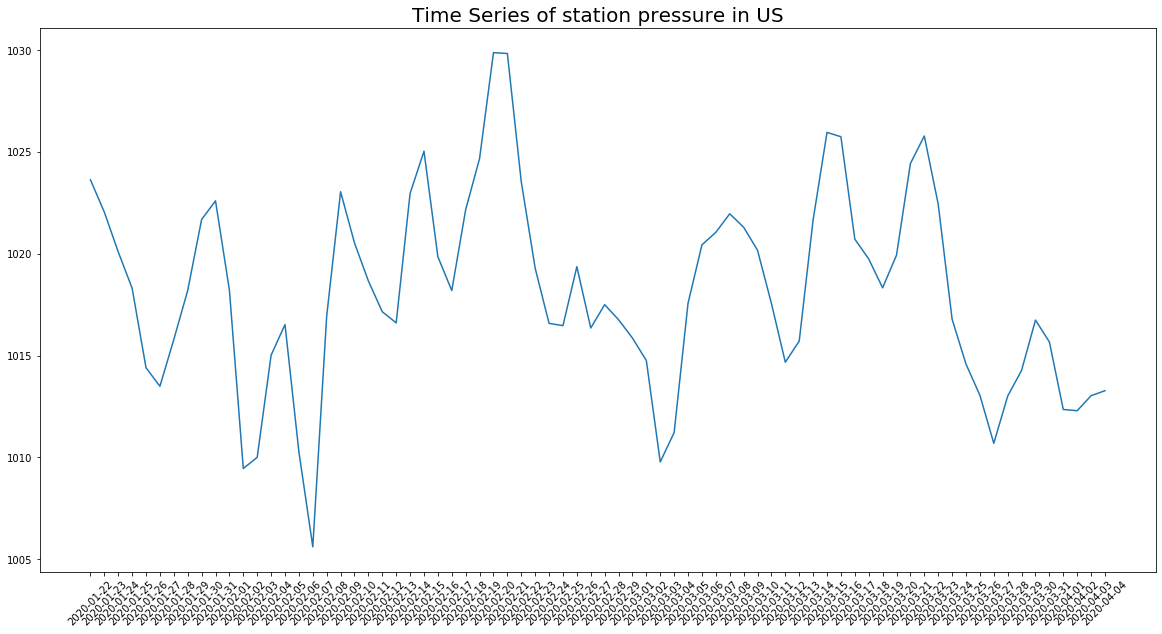

In [14]:
plot_pressure_by_day('US')

#### Check different countries

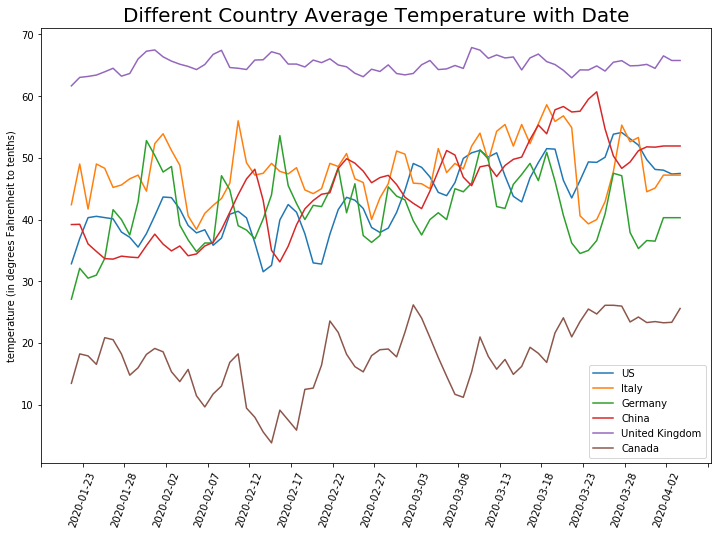

In [62]:
clist = ['US', 'Italy', 'Germany', 'China', 'United Kingdom', 'Canada']
fig, ax = plt.subplots(figsize=(12,8))
for country in clist:
    df = weather_df.groupby(['Date', 'Country_Region']).agg({'temp':'mean'}).reset_index()
    df.rename(columns={'temp':'temperature'}, inplace=True)
    ax.plot(df[df['Country_Region']==country].Date, df[df['Country_Region']==country].temperature, label = country)
    plt.xticks(rotation=70)
    
start, end = ax.get_xlim()
ax.xaxis.set_ticks(np.arange(start, end, 5))
ax.set_ylabel("temperature (in degrees Fahrenheit to tenths)")
ax.legend()
ax.set_title("Different Country Average Temperature with Date", fontsize=20)
plt.show()
fig.savefig('weather_goverment_data/weather.png')

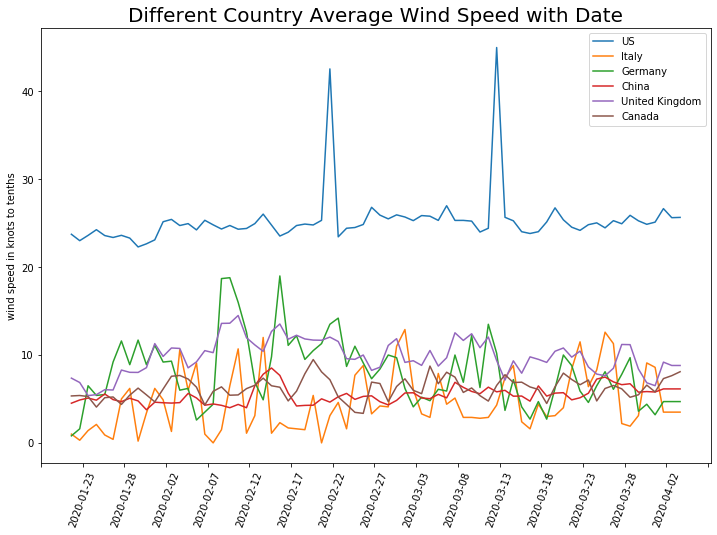

In [63]:
fig, ax = plt.subplots(figsize=(12,8))
for country in clist:
    df = weather_df.groupby(['Date', 'Country_Region']).agg({'wdsp':'mean'}).reset_index()
    df.rename(columns={'wdsp':'wind speed'}, inplace=True)
    ax.plot(df[df['Country_Region']==country].Date, df[df['Country_Region']==country]['wind speed'], label = country)
    plt.xticks(rotation=70)
    
start, end = ax.get_xlim()
ax.xaxis.set_ticks(np.arange(start, end, 5))
ax.set_ylabel("wind speed in knots to tenths")
ax.legend()
ax.set_title("Different Country Average Wind Speed with Date", fontsize=20)
plt.show()
fig.savefig('weather_goverment_data/wind.png')

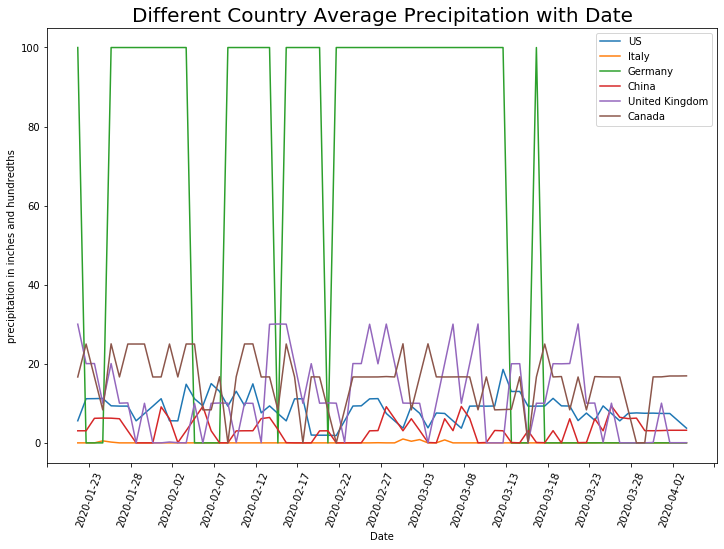

In [64]:
fig, ax = plt.subplots(figsize=(12,8))
for country in clist:
    df = weather_df.groupby(['Date', 'Country_Region']).agg({'prcp':'mean'}).reset_index()
    df.rename(columns={'prcp':'precipitation'}, inplace=True)
    ax= sns.lineplot(df[df['Country_Region']==country].Date, df[df['Country_Region']==country].precipitation, label = country)
    plt.xticks(rotation=70)

ax.xaxis.set_ticks(np.arange(start, end, 5))
ax.legend()
ax.set_ylabel("precipitation in inches and hundredths")
ax.set_title("Different Country Average Precipitation with Date", fontsize=20)
plt.show()
fig.savefig('weather_goverment_data/precipitation.png')

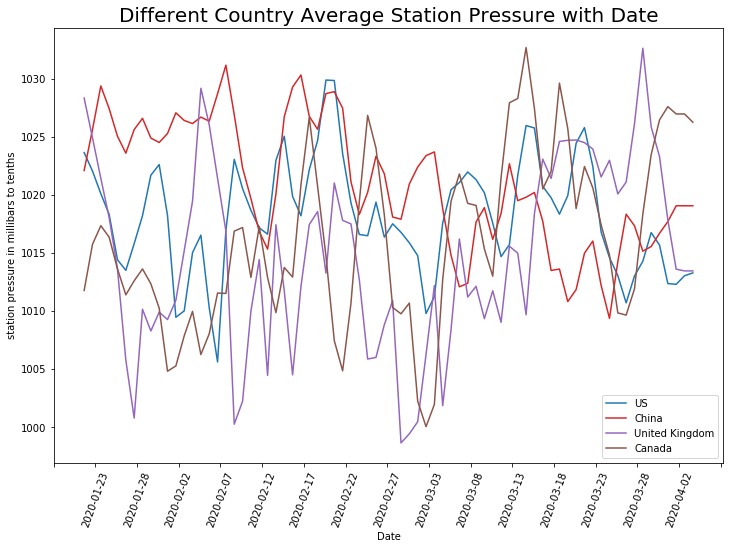

In [65]:
fig, ax = plt.subplots(figsize=(12,8))
for country in clist:
    df = weather_df.groupby(['Date', 'Country_Region']).agg({'slp':'mean'}).reset_index()
    df.rename(columns={'slp':'station pressure'}, inplace=True)
    ax= sns.lineplot(df[df['Country_Region']==country].Date, df[df['Country_Region']==country]['station pressure'], label = country)
    plt.xticks(rotation=70)

ax.xaxis.set_ticks(np.arange(start, end, 5))
ax.set_ylabel("station pressure in millibars to tenths")
ax.legend()
ax.set_title("Different Country Average Station Pressure with Date", fontsize=20)
plt.show()
fig.savefig('weather_goverment_data/pressure.png')

### Goverment measure

In [71]:
# gover_df = pd.read_excel("covid-19-goverment-measures.xlsx", "Database")
# gover_df = gover_df.replace('United States of America', 'US')
# gover_df = gover_df.replace('Schools closure\xa0', 'Schools closure')
# gover_df = gover_df.replace('Border closure\xa0', 'Border closure')
# gover_df = gover_df.replace('Border checks\xa0', 'Border checks')
# gover_df = gover_df.replace('Public services closure\xa0', 'Public services closure')
# gover_df.to_csv("covid-19-goverment-measures.csv", index=False)

In [54]:
gover_df = pd.read_csv("weather_goverment_data/covid-19-goverment-measures.csv")
gover_df.DATE_IMPLEMENTED = pd.to_datetime(gover_df.DATE_IMPLEMENTED)
gover_df.head()

,ID,COUNTRY,ISO,ADMIN_LEVEL_NAME,PCODE,REGION,CATEGORY,MEASURE,TARGETED_POP_GROUP,COMMENTS,NON_COMPLIANCE,DATE_IMPLEMENTED,SOURCE,SOURCE_TYPE,LINK,ENTRY_DATE,Alternative source
0,1,Afghanistan,AFG,NaN,NaN,Asia,Public health measures,Health screenings in airports and border crossings,No,NaN,NaN,2020-02-12,Ministry of Health,Government,https://moph.gov.af/en/moph-held-emergency-meeting-international-health-partners-fight-against-spread-and-control-covid-19,2020-03-14,NaN
1,2,Afghanistan,AFG,Kabul,NaN,Asia,Public health measures,Introduction of quarantine policies,No,NaN,NaN,2020-02-12,Ministry of Health,Government,https://moph.gov.af/en/moph-held-emergency-meeting-international-health-partners-fight-against-spread-and-control-covid-19,2020-03-14,NaN
2,3,Afghanistan,AFG,NaN,NaN,Asia,Public health measures,Awareness campaigns,No,NaN,NaN,2020-02-12,Ministry of Health,Government,https://moph.gov.af/en/moph-held-emergency-meeting-international-health-partners-fight-against-spread-and-control-covid-19,2020-03-14,NaN
3,4,Afghanistan,AFG,NaN,NaN,Asia,Governance and socio-economic measures,Emergency administrative structures activated or established,No,NaN,NaN,2020-02-12,Ministry of Health,Government,https://moph.gov.af/en/moph-held-emergency-meeting-international-health-partners-fight-against-spread-and-control-covid-19,2020-03-14,NaN
4,5,Afghanistan,AFG,NaN,NaN,Asia,Social distancing,Limit public gatherings,No,Nevruz festival cancelled,NaN,2020-03-12,AA,Media,https://www.aa.com.tr/en/asia-pacific/coronavirus-afghanistan-scraps-annual-nevruz-festival/1763830,2020-03-14,NaN


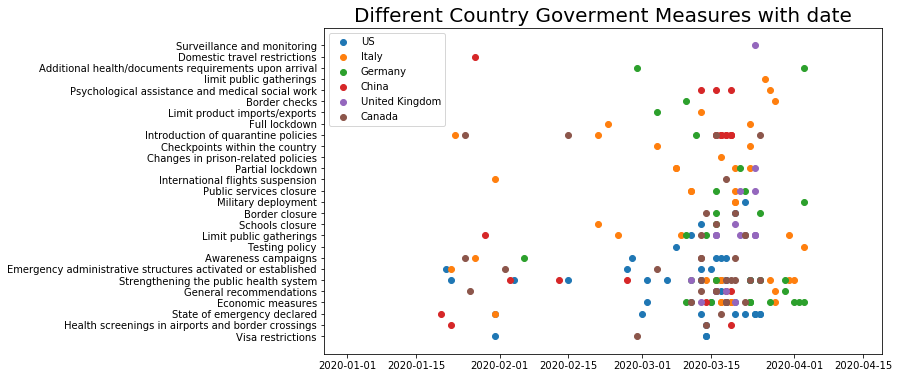

In [69]:
#clist = ['US', 'Spain', 'Italy', 'Germany', 'France', 'China', 'Ira', 'United Kingdom', 'Japan', 'Canada']
clist = ['US', 'Italy', 'Germany', 'China', 'United Kingdom', 'Canada']
fig, ax = plt.subplots(figsize=(10,6))
for country in clist:
    ax.scatter(gover_df[gover_df['COUNTRY']==country].DATE_IMPLEMENTED, gover_df[gover_df['COUNTRY']==country].MEASURE, label = country)

ax.legend()
ax.set_title("Different Country Goverment Measures with date", fontsize=20)
plt.show()
fig.savefig('weather_goverment_data/messures.png', pad_inches=1)

In [68]:
fig.savefig?